In [102]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [29]:
# 1. Load the training data
train_file = 'dataset/training_data.csv'
data = pd.read_csv(train_file, sep='\t',header=None, index_col=None)
data = data.replace(r'\t', ' ', regex=True)

In [35]:
data.columns = ["label","headline"]

In [37]:
# Inspect the data
data.tail(20)

,label,headline
34132,1,under trump plan refugees from 11 countries fa...
34133,1,britain aiming for outline brexit transition d...
34134,1,ugandan mps get $8000 each for work on extendi...
34135,1,restoring legality in catalonia is spanish gov...
34136,1,an independent catalonia would be out of the e...
34137,1,plague kills 124 in madagascar cities most aff...
34138,1,india agrees to hold talks on afghanistan with...
34139,1,families returning to ruined philippine city t...
34140,1,greens say no support for macron's ez budget i...
34141,1,spain aims to avoid economic damage to catalon...


In [43]:
# Separate features and labels
X = data['headline'] # Column with headlines
y = data['label'] # Column with labels (0 or 1)

# 2. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Text preprocessing with TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 4. Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_tfidf, y_train)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3515
           1       0.92      0.94      0.93      3316

    accuracy                           0.93      6831
   macro avg       0.93      0.93      0.93      6831
weighted avg       0.93      0.93      0.93      6831



              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3515
           1       0.92      0.94      0.93      3316

    accuracy                           0.93      6831
   macro avg       0.93      0.93      0.93      6831
weighted avg       0.93      0.93      0.93      6831



<Figure size 800x600 with 0 Axes>

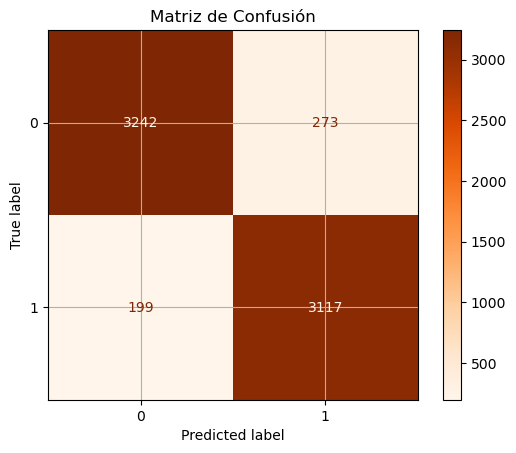

In [111]:
# 5. Evaluate the model
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])  # Cambia las etiquetas según sea necesario
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')
plt.grid(True)
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
# 6. Save the model and the vectorizer
with open('news_classifier.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)